# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Uma M Subramanian
## Repo link: https://github.com/umams2002/web-scraping

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

## Task 0: Prequisties 

In [1]:
from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                   Version
------------------------- --------------
annotated-types           0.6.0
anyio                     4.3.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.14.0
beautifulsoup4            4.12.3
bleach                    6.1.0
blis                      0.7.11
catalogue                 2.0.10
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        3.3.2
click                     8.1.7
cloudpathlib              0.16.0
colorama                  0.4.6
comm                      0.2.2
confection                0.1.4
contourpy                 1.2.1
cycler                    0.12.1
cymem                     2.0.8
debugpy                   1.8.1
decorator                 5.1.1
defusedxml                0.7.1
executing                 2.0.1
fastjsonschema  

## Task 1

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [27]:
import requests
import pickle

url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")
html_content = str(soup.find("article"))
#html_content = response.text

with open("article_html.pkl", "wb") as f:
    pickle.dump(html_content, f)

print("Article HTML extracted and saved to 'article_html.pkl'")

Article HTML extracted and saved to 'article_html.pkl'


## Task 2

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [28]:
from bs4 import BeautifulSoup
import pickle

with open("article_html.pkl", "rb") as f:
    html_content = pickle.load(f)

soup = BeautifulSoup(html_content, "html.parser")
text = soup.get_text()
print(text)



How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

## Task 3

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [29]:
import spacy
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load("en_core_web_sm")

doc = nlp(text)
filtered_tokens = [token.text.lower() for token in doc if token.is_alpha and token.text.lower() not in STOP_WORDS]
most_common_tokens = Counter(filtered_tokens).most_common(5)

print("Most common tokens:")
for token, frequency in most_common_tokens:
    print(f"{token}: {frequency}")

all_tokens = Counter(filtered_tokens)
print("\nAll tokens and their frequencies:")
for token, frequency in all_tokens.items():
    print(f"{token}: {frequency}")

Most common tokens:
laser: 35
headlights: 19
headlight: 11
technology: 10
led: 10

All tokens and their frequencies:
laser: 35
headlights: 19
work: 2
comments: 1
lewin: 1
day: 3
march: 2
think: 1
onward: 1
automotive: 6
technology: 10
usually: 1
thing: 2
come: 5
mind: 3
engines: 1
fuel: 1
efficiency: 3
switch: 2
electric: 1
power: 3
mean: 1
thousands: 1
engineers: 2
world: 2
working: 1
improve: 1
state: 2
art: 1
lighting: 4
sealed: 2
beam: 7
gave: 1
way: 4
modern: 2
designs: 3
regulations: 1
loosened: 1
bulbs: 1
moved: 2
simple: 3
halogens: 1
xenon: 1
hids: 1
recently: 1
leds: 6
new: 3
scene: 1
lasers: 5
bwm: 2
prototype: 1
headlight: 11
assemblies: 1
undergoing: 1
testing: 1
image: 2
brought: 1
phrase: 1
beams: 5
firing: 1
automobile: 1
obviously: 1
coherent: 1
monochromatic: 1
light: 9
poor: 1
illumination: 2
outside: 1
specific: 1
spot: 2
distance: 1
away: 1
thankfully: 2
eyes: 1
instead: 1
consist: 1
solid: 1
diodes: 2
mounted: 1
inside: 3
blue: 1
fired: 1
yellow: 1
phosphor: 3
sim

## Task 4

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [32]:
import spacy
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

filtered_lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]

most_common_lemmas = Counter(filtered_lemmas).most_common(5)

print("Most common lemmas:")
for lemma, frequency in most_common_lemmas:
    print(f"{lemma}: {frequency}")

all_lemmas = Counter(filtered_lemmas)
print("\nAll lemmas and their frequencies:")
for lemma, frequency in all_lemmas.items():
    print(f"{lemma}: {frequency}")


Most common lemmas:
laser: 40
headlight: 28
beam: 12
technology: 10
light: 10

All lemmas and their frequencies:
laser: 40
headlights: 2
work: 3
130: 1
comments: 1
lewin: 1
day: 4
march: 2
22: 1
2021: 1
think: 1
onward: 1
automotive: 6
technology: 10
headlight: 28
usually: 1
thing: 3
come: 7
mind: 3
engine: 1
fuel: 1
efficiency: 3
switch: 2
electric: 1
power: 3
mean: 2
thousand: 1
engineer: 2
world: 2
improve: 1
state: 2
art: 1
lighting: 4
seal: 1
beam: 12
give: 1
way: 4
modern: 2
design: 6
regulation: 1
loosen: 1
bulb: 1
move: 2
simple: 3
halogen: 1
xenon: 1
hids: 1
recently: 1
led: 7
new: 3
scene: 1
bwm: 2
prototype: 1
assembly: 2
undergo: 1
testing: 1
image: 2
bring: 2
phrase: 1
fire: 2
automobile: 2
obviously: 1
coherent: 1
monochromatic: 1
light: 10
poor: 1
illumination: 2
outside: 1
specific: 1
spot: 2
distance: 1
away: 1
thankfully: 2
eye: 1
instead: 1
consist: 1
solid: 1
diode: 5
mount: 1
inside: 3
blue: 1
yellow: 1
phosphor: 3
similar: 1
white: 2
produce: 1
powerful: 2
vibrant

## Task 5

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [33]:
def score_sentence_by_token(sentence, interesting_tokens):
    tokens = sentence.lower().split()
    score = sum(1 for token in tokens if token.lower() in interesting_tokens) / len(tokens)
    return score

def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc = nlp(sentence)
    lemmas = [token.lemma_.lower() for token in doc]
    score = sum(1 for lemma in lemmas if lemma in interesting_lemmas) / len(lemmas)
    return score

sentence = "Instead, laser headlights consist of one or more solid state laser diodes mounted inside the headlight."
interesting_tokens = ["laser","headlight"]
interesting_lemmas = ["laser","headlight"]

token_score = score_sentence_by_token(sentence, interesting_tokens)
lemma_score = score_sentence_by_lemma(sentence, interesting_lemmas)

print(f"Token score: {token_score}")
print(f"Lemma score: {lemma_score}")


Token score: 0.125
Lemma score: 0.2222222222222222


## Task 6

6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

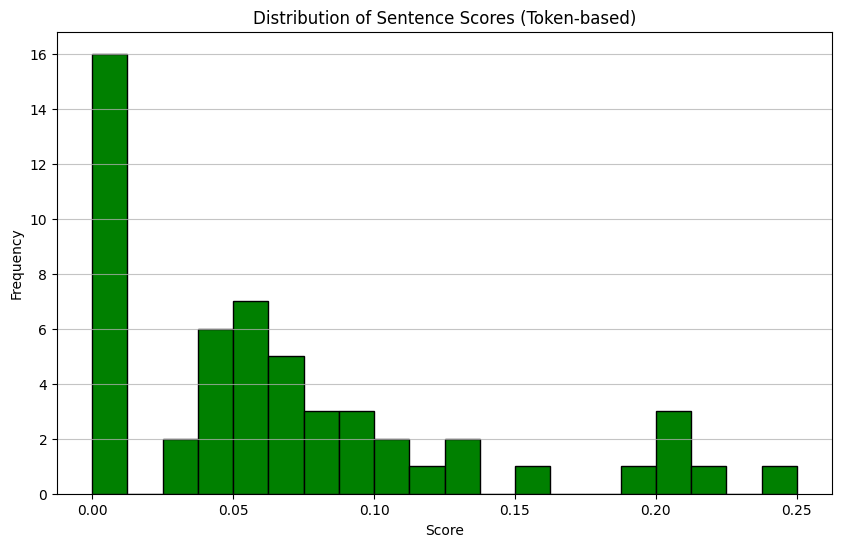

In [34]:
import matplotlib.pyplot as plt

sentences = text.split('.')
scores = [score_sentence_by_token(sentence, [token.lower() for token, _ in most_common_tokens]) for sentence in sentences if sentence.strip()]

# Plot a histogram
plt.figure(figsize=(10, 6))
plt.hist(scores, bins=20, color='green', edgecolor='black')
plt.title('Distribution of Sentence Scores (Token-based)')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


## Task 7

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

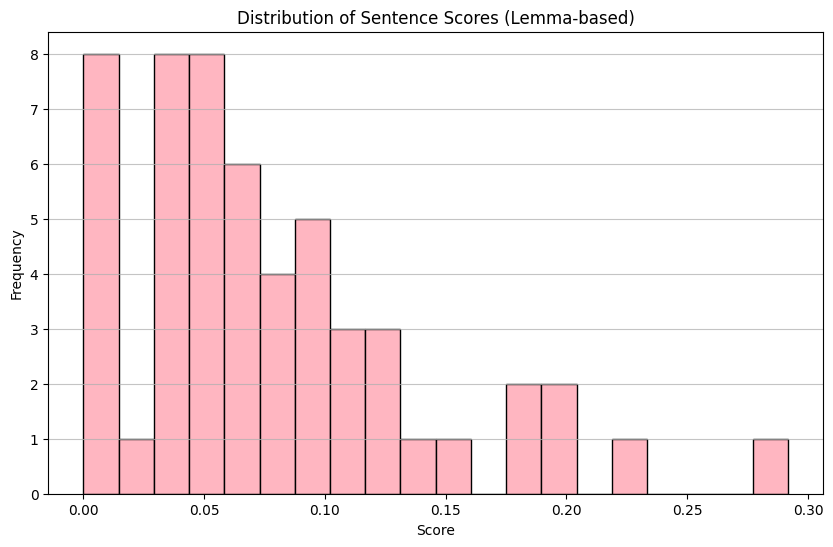

In [39]:
scores_lemma = [score_sentence_by_lemma(sentence, [lemma.lower() for lemma, _ in most_common_lemmas]) for sentence in sentences if sentence.strip()]

# Plot a histogram
plt.figure(figsize=(10, 6))
plt.hist(scores_lemma, bins=20, color='lightpink', edgecolor='black')
plt.title('Distribution of Sentence Scores (Lemma-based)')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


## Task 8

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

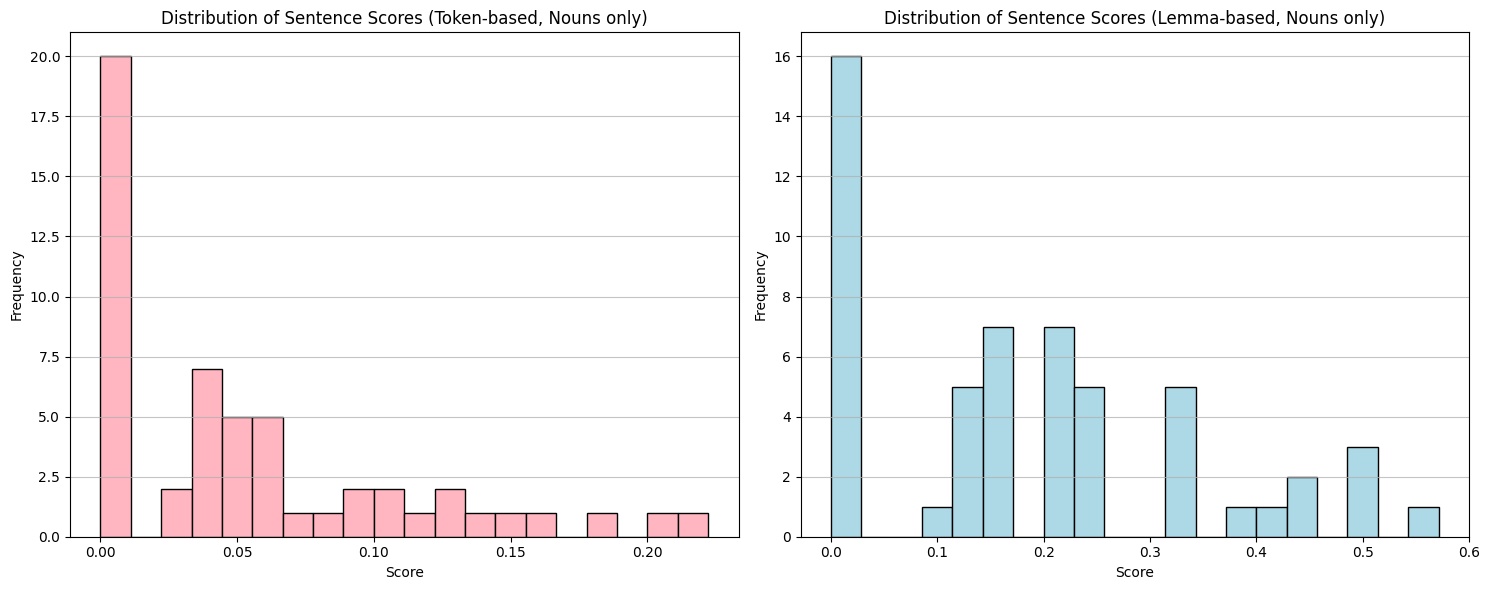

In [42]:
def score_sentence_by_token(sentence, interesting_tokens):
    tokens = sentence.lower().split()
    score = sum(1 for token in tokens if token.lower() in interesting_tokens and nlp(token)[0].pos_ == 'NOUN') / len(tokens)
    return score

def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc = nlp(sentence)
    lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space and token.pos_ == "NOUN"]
    score = sum(1 for lemma in lemmas if lemma in interesting_lemmas) / len(lemmas)
    return score

interesting_tokens = [token.lower() for token, _ in most_common_tokens if nlp(token)[0].pos_ == "NOUN"]
interesting_lemmas = [lemma.lower() for lemma, _ in most_common_lemmas if nlp(lemma)[0].pos_ == "NOUN"]

scores_noun_token = [score_sentence_by_token(sentence, interesting_tokens) for sentence in sentences]
scores_noun_lemma = [score_sentence_by_lemma(sentence, interesting_lemmas) for sentence in sentences]

# Plot histograms 
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.hist(scores_noun_token, bins=20, color='lightpink', edgecolor='black')
plt.title('Distribution of Sentence Scores (Token-based, Nouns only)')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.subplot(1, 2, 2)
plt.hist(scores_noun_lemma, bins=20, color='lightblue', edgecolor='black')
plt.title('Distribution of Sentence Scores (Lemma-based, Nouns only)')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()
